In [3]:
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt 

palette = sns.color_palette()

In [4]:
# Load the iris dataset
iris = sns.load_dataset('iris')
# Display the first few rows of the dataset
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [5]:
setosa = iris[iris['species'] == 'setosa']
virginica = iris[iris['species'] == 'virginica']

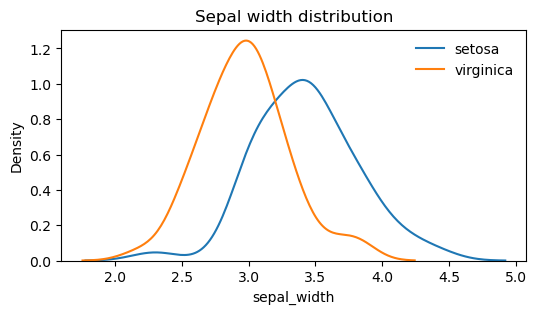

In [6]:
plt.figure(figsize=(6,3))
plt.title(f'Sepal width distribution')
sns.kdeplot(data=setosa,x='sepal_width',color=palette[0],label='setosa');
sns.kdeplot(data=virginica,x='sepal_width',color=palette[1],label='virginica');
plt.legend(frameon=False)
plt.show()

In [10]:
from scipy.stats import mannwhitneyu
from scipy.stats import rankdata

In [220]:
clay = [24, 41, 17, 38]
sandy = [22, 6, 11, 15, 4]


n_clay = len(clay)
n_sandy = len(sandy)

In [221]:
mannwhitneyu(clay, sandy)

MannwhitneyuResult(statistic=19.0, pvalue=0.031746031746031744)

In [222]:
mannwhitneyu(sandy, clay)

MannwhitneyuResult(statistic=1.0, pvalue=0.031746031746031744)

In [223]:
# Returns the U statistic of the first group
u_statistic, p_value = mannwhitneyu(clay, sandy)
u_statistic, p_value

(19.0, 0.031746031746031744)

In [226]:
r_clay, r_sandy, n_clay, n_sandy

(29.0, 16.0, 4, 5)

In [225]:
# Combine the data from both groups
combined_data = np.concatenate([clay, sandy])

# Rank the combined data
ranks = rankdata(combined_data)

# Separate the ranks back into the original groups
clay_ranks = ranks[:len(clay)]
sandy_ranks = ranks[len(clay):]  # Corrected slicing

# Calculate the sum of ranks for each group
r_clay = np.sum(clay_ranks)
r_sandy = np.sum(sandy_ranks)

# Calculate U statistics for both groups
n_clay = len(clay)
n_sandy = len(sandy)

# Calculate U statistic for clay (first group)
u_clay = n_clay * n_sandy + (n_clay * (n_clay + 1)) / 2 - r_clay

# Calculate U statistic for sandy (second group)
u_sandy = n_clay * n_sandy + (n_sandy * (n_sandy + 1)) / 2 - r_sandy

u_clay, u_sandy

(1.0, 19.0)

In [52]:
def mann_whitney_critical_value(n1, n2, alpha=0.05, alternative='two-sided'):
    # Mean and standard deviation of U under the null hypothesis
    mean_U = n1 * n2 / 2
    std_U = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
    
    # Z critical value for the desired confidence level
    if alternative == 'two-sided':
        z_critical = stats.norm.ppf(1 - alpha/2)
    elif alternative == 'less':
        z_critical = stats.norm.ppf(alpha)
    else:  # 'greater'
        z_critical = stats.norm.ppf(1 - alpha)
    
    # Calculate the critical value of U
    U_critical = mean_U - z_critical * std_U
    return U_critical

In [55]:
n_clay, n_sandy

(4, 5)

In [54]:
mann_whitney_critical_value(n_clay, n_sandy, alpha=0.05, alternative='two-sided')

1.998480539407817

----

[Calculate U for the second sample manually](https://docs.scipy.org/doc/scipy-1.7.1/reference/reference/generated/scipy.stats.mannwhitneyu.html)

In [149]:
mannwhitneyu(clay, sandy,use_continuity=True)[1], mannwhitneyu(clay, sandy,use_continuity=False)[1]

(0.031746031746031744, 0.031746031746031744)

In [152]:
mannwhitneyu(clay, sandy,method='asymptotic')[1]

0.03733641592066288

In [263]:
u = min([u_clay,u_sandy])

# Correct calculation of u_expected_value
u_expected_value = (n_clay * n_sandy) / 2

# Correct calculation of u_std_err
u_std_err = np.sqrt((n_clay * n_sandy * (n_clay + n_sandy + 1)) / 12)

# Correct z-score calculation
#u_z = (u - u_expected_value) / u_std_err
u_z = (u - 0.5 - u_expected_value) / u_std_err


# Correct p-value calculation for a two-tailed test
u_p_value = stats.norm.cdf(u_z) * 2
u_p_value

0.019964453305216043

0.0441713449084426

In [162]:
u_std_err = np.sqrt(((n_clay * n_sandy) * (n_clay + n_sandy +1))  / (n_clay + n_sandy +1))
u_std_err

4.47213595499958

In [163]:
z_clay = (u_clay - expected_value)/u_std_err
z_clay, stats.norm.cdf(z_clay) * 2 

(-2.0124611797498106, 0.0441713449084426)

In [164]:
z_sandy = (u_sandy - expected_value)/np.std(sandy)
z_sandy, stats.norm.cdf(z_sandy) * 2

(1.391382931731989, 1.8358906624098794)

(0.031746031746031744,
 0.031746031746031744,
 0.03733641592066288,
 0.02748633611151033)

In [165]:
U_2 = n_clay*n_sandy - u_clay
U_2, U_2 == u_sandy

(19.0, True)

In [166]:
U = min(u_clay, u_sandy)
N = n_clay + n_sandy

In [174]:
'''

mannwhitneyu reduces the distance between the test statistic and the mean 
by 0.5 to correct for the fact that the discrete statistic is being compared against a continuous distribution. Here, the 
statistic used is less than the mean, so we reduce the distance by adding 0.5 in the numerator.

'''

z = (U - n_clay*n_sandy/2 + 0.5) / np.sqrt(n_clay*n_sandy * (N + 1)/ 12)
stats.norm.cdf(z) * 2, mannwhitneyu(clay, sandy,use_continuity=True, method='asymptotic')[1]

(0.03733641592066288, 0.03733641592066288)

In [177]:
z = (U - n_clay*n_sandy/2 ) / np.sqrt(n_clay*n_sandy * (N + 1)/ 12)
stats.norm.cdf(z) * 2, mannwhitneyu(clay, sandy,use_continuity=False, method='asymptotic')[1]

(0.02748633611151033, 0.02748633611151033)

In [265]:
stats.norm.cdf(z)

0.013743168055755164

In [205]:
import itertools
import numpy as np

In [251]:
# Combine the two samples
combined = clay + sandy
n_clay = len(clay)
n_sandy = len(sandy)

# Generate ranks
ranks = np.argsort(np.argsort(combined)) + 1

# Calculate U for the clay group
u_clay = sum(ranks[:n_clay]) - (n_clay * (n_clay + 1)) / 2

# Calculate U for the sandy group
u_sandy = sum(ranks[n_clay:]) - (n_sandy * (n_sandy + 1)) / 2

# Use the smaller U statistic for the test
u_observed = min(u_clay, u_sandy)

# Generate all possible combinations of ranks
all_combinations = list(itertools.combinations(ranks, n_clay))

# Calculate the U statistic for each combination
u_distribution = [sum(comb) - (n_clay * (n_clay + 1)) / 2 for comb in all_combinations]

# Count the number of U statistics less than or equal to the observed U
count_leq_observed = sum(1 for u in u_distribution if u <= u_observed)

# Calculate the exact p-value
p_value_exact = count_leq_observed / len(u_distribution)

p_value_exact * 2 == mannwhitneyu(clay, sandy,use_continuity=False, method='exact')[1], p_value_exact * 2

(True, 0.031746031746031744)

In [256]:
sum(1 for u in u_distribution if u >= 19) / len(u_distribution), sum(1 for u in u_distribution if u <= 1) / len(u_distribution)

0.015873015873015872

0.015873015873015872

In [250]:
count_leq_observed = sum(1 for u in u_distribution if u <= 1)
count_geq_observed = sum(1 for u in u_distribution if u >= 19)
(count_leq_observed + count_geq_observed) / len(u_distribution)


0.031746031746031744

0.031746031746031744

0.015873015873015817

True

In [170]:
mannwhitneyu(clay, sandy,use_continuity=True, method='exact')[1],\
mannwhitneyu(clay, sandy,use_continuity=False, method='exact')[1],\
mannwhitneyu(clay, sandy,use_continuity=True, method='asymptotic')[1],\
mannwhitneyu(clay, sandy,use_continuity=False, method='asymptotic')[1]

(0.031746031746031744,
 0.031746031746031744,
 0.03733641592066288,
 0.02748633611151033)

9.874208829065749

In [77]:
# asymptotic p value
mannwhitneyu(clay, sandy, alternative='greater', method='asymptotic')[1]

0.01866820796033144

In [169]:
stats.norm.cdf(z)

0.01866820796033144

In [76]:
# Two-tailed
p = 2 * stats.norm.cdf(z)
p

0.03733641592066288

In [79]:
# asymptotic p value
mannwhitneyu(clay, sandy, alternative='greater', use_continuity=False, method='asymptotic')[1]

0.013743168055755164

19.0

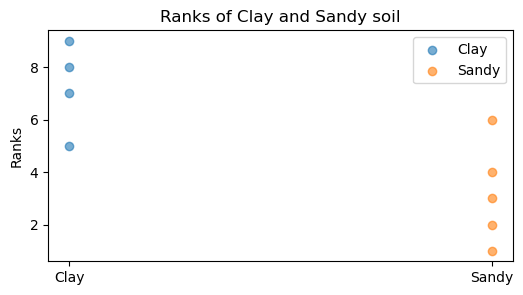

In [26]:
# Plot the ranks
plt.figure(figsize=(6,3))
plt.scatter(np.full_like(clay_ranks, 1), clay_ranks, label='Clay', alpha=0.6)
plt.scatter(np.full_like(sandy_ranks, 2), sandy_ranks, label='Sandy', alpha=0.6)
plt.xticks([1, 2], ['Clay', 'Sandy'])
plt.ylabel('Ranks')
plt.title('Ranks of Clay and Sandy soil')
plt.legend()
plt.show()

In [9]:
# Assuming setosa['sepal_width'] and virginica['sepal_width'] are your data arrays
u_statistic, p_value = mannwhitneyu(setosa['sepal_width'], virginica['sepal_width'])
u_statistic, p_value

(2086.0, 7.099708901764312e-09)

In [12]:
# Combine the data from both groups
combined_data = np.concatenate([setosa['sepal_width'], virginica['sepal_width']])

# Rank the combined data
ranks = rankdata(combined_data)

# Separate the ranks back into the original groups
setosa_ranks = ranks[:len(setosa['sepal_width'])]
virginica_ranks = ranks[len(setosa['sepal_width']):]

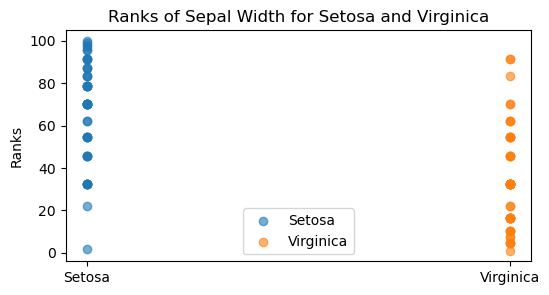

In [13]:
# Plot the ranks
plt.figure(figsize=(6,3))
plt.scatter(np.full_like(setosa_ranks, 1), setosa_ranks, label='Setosa', alpha=0.6)
plt.scatter(np.full_like(virginica_ranks, 2), virginica_ranks, label='Virginica', alpha=0.6)
plt.xticks([1, 2], ['Setosa', 'Virginica'])
plt.ylabel('Ranks')
plt.title('Ranks of Sepal Width for Setosa and Virginica')
plt.legend()
plt.show()